In [4]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf
from __future__ import division

In [6]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:
    ticker_reader = yf.Ticker(stock)
    globals()[stock] = ticker_reader.history(period='id', start=start, end=end)

In [7]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02,250.000000,250.0
mean,168.452252,170.068542,167.110268,168.696102,6.094663e+07,0.003800,0.0
std,18.728568,18.556395,18.869776,18.689874,1.866465e+07,0.029865,0.0
min,125.309579,127.059795,123.479803,124.325081,2.404830e+07,0.000000,0.0
25%,153.038254,155.730783,152.379369,153.936226,4.857445e+07,0.000000,0.0
50%,172.840437,174.157757,171.454271,173.476456,5.612015e+07,0.000000,0.0
75%,182.270907,183.893735,181.321115,182.664349,6.808168e+07,0.000000,0.0
max,195.717515,197.702207,194.760064,195.926956,1.601569e+08,0.240000,0.0


In [8]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-12-12 00:00:00-05:00 to 2023-12-08 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Volume        250 non-null    int64  
 5   Dividends     250 non-null    float64
 6   Stock Splits  250 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 15.6 KB


<Axes: title={'center': 'Close price'}, xlabel='Date'>

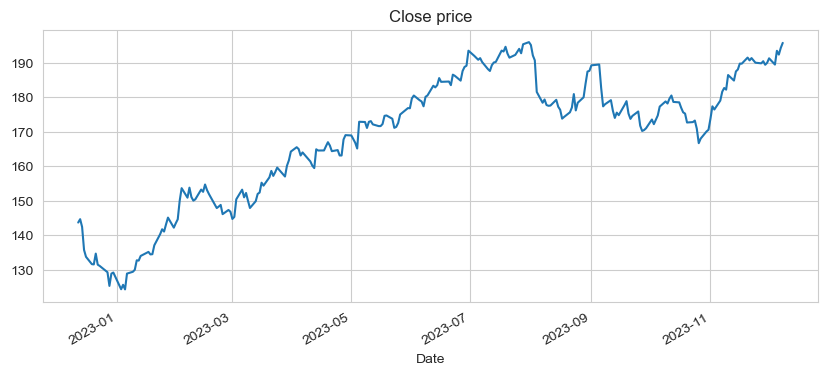

In [9]:
# Seeing a historical view of the closing price
AAPL['Close'].plot(figsize=(10, 4), title='Close price')

<Axes: title={'center': 'Volume'}, xlabel='Date'>

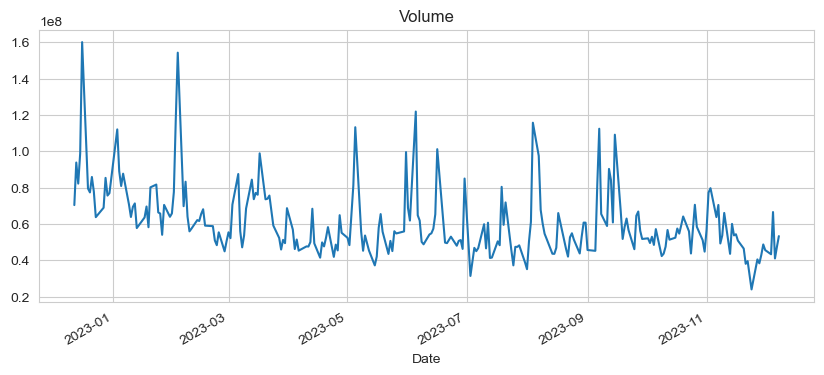

In [10]:
# Plotting the total volume of stock being traded each day over the past 5 years
AAPL['Volume'].plot(figsize=(10, 4), title='Volume')

In [11]:
# Plotting out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = 'MA for %s days'%(str(ma))
    AAPL[column_name] = AAPL['Close'].rolling(ma).mean()

<Axes: xlabel='Date'>

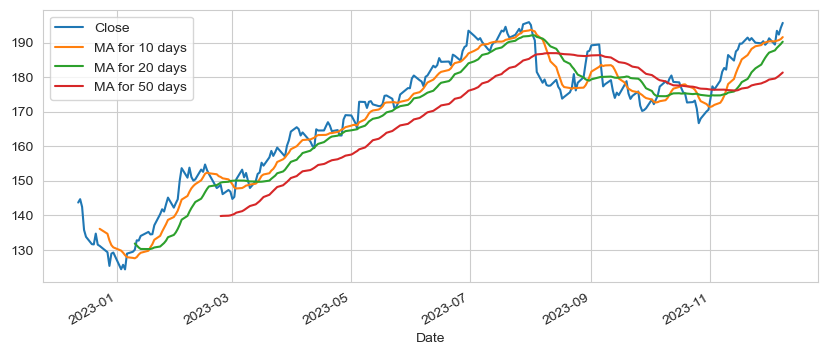

In [12]:
 AAPL[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False, figsize=(10, 4))

<Axes: xlabel='Date'>

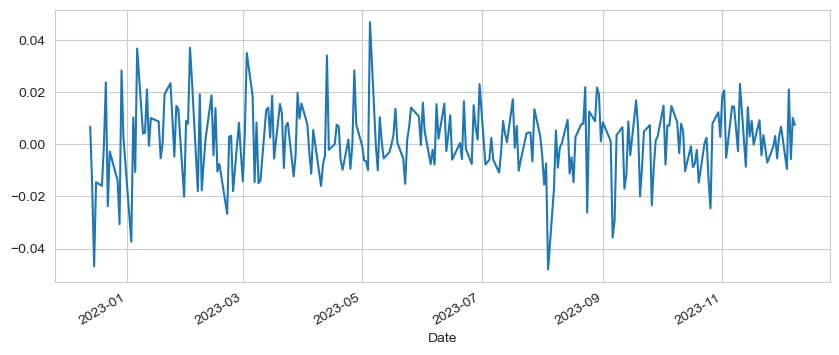

In [13]:
# Using pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Close'].pct_change()
# Plotting the daily return percentage
AAPL['Daily Return'].plot(figsize=(10, 4))

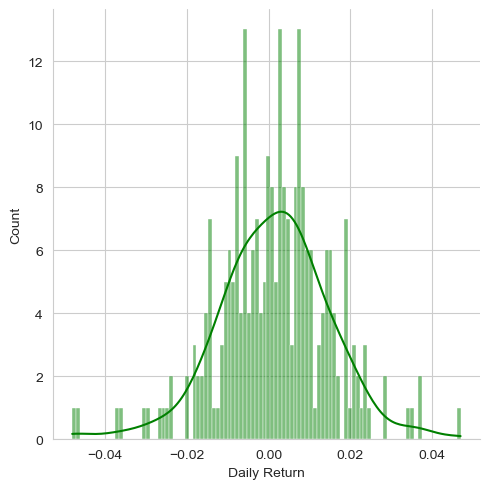

In [14]:
sns.displot(AAPL['Daily Return'].dropna(), bins=100, color='green', kde=True)

In [15]:
# Grabbing all the closing prices for the tech stock list into one DataFrame
closing_df = pd.DataFrame()
for stock in tech_list:
    closing_df[stock] =  yf.Ticker(stock).history(period='id', start=start, end=end)['Close']

In [16]:
# Quick look
closing_df.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2022-12-12 00:00:00-05:00,143.686859,93.559998,250.290695,90.550003
2022-12-13 00:00:00-05:00,144.661423,95.849998,254.661942,92.489998
2022-12-14 00:00:00-05:00,142.413971,95.309998,254.959320,91.580002
2022-12-15 00:00:00-05:00,135.741272,91.199997,246.821442,88.449997
2022-12-16 00:00:00-05:00,133.762329,90.860001,242.539413,87.860001


In [17]:
# Making a new tech returns DataFrame
tech_rets = closing_df.pct_change()

In [18]:
tech_rets.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2022-12-12 00:00:00-05:00,NaN,NaN,NaN,NaN
2022-12-13 00:00:00-05:00,0.006783,0.024476,0.017465,0.021425
2022-12-14 00:00:00-05:00,-0.015536,-0.005634,0.001168,-0.009839
2022-12-15 00:00:00-05:00,-0.046854,-0.043122,-0.031918,-0.034178
2022-12-16 00:00:00-05:00,-0.014579,-0.003728,-0.017349,-0.006670


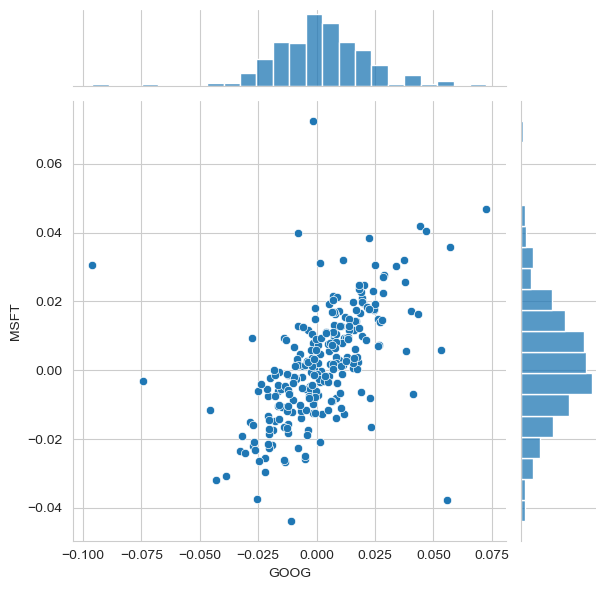

In [19]:
# Using joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG',y='MSFT', data=tech_rets, kind='scatter')

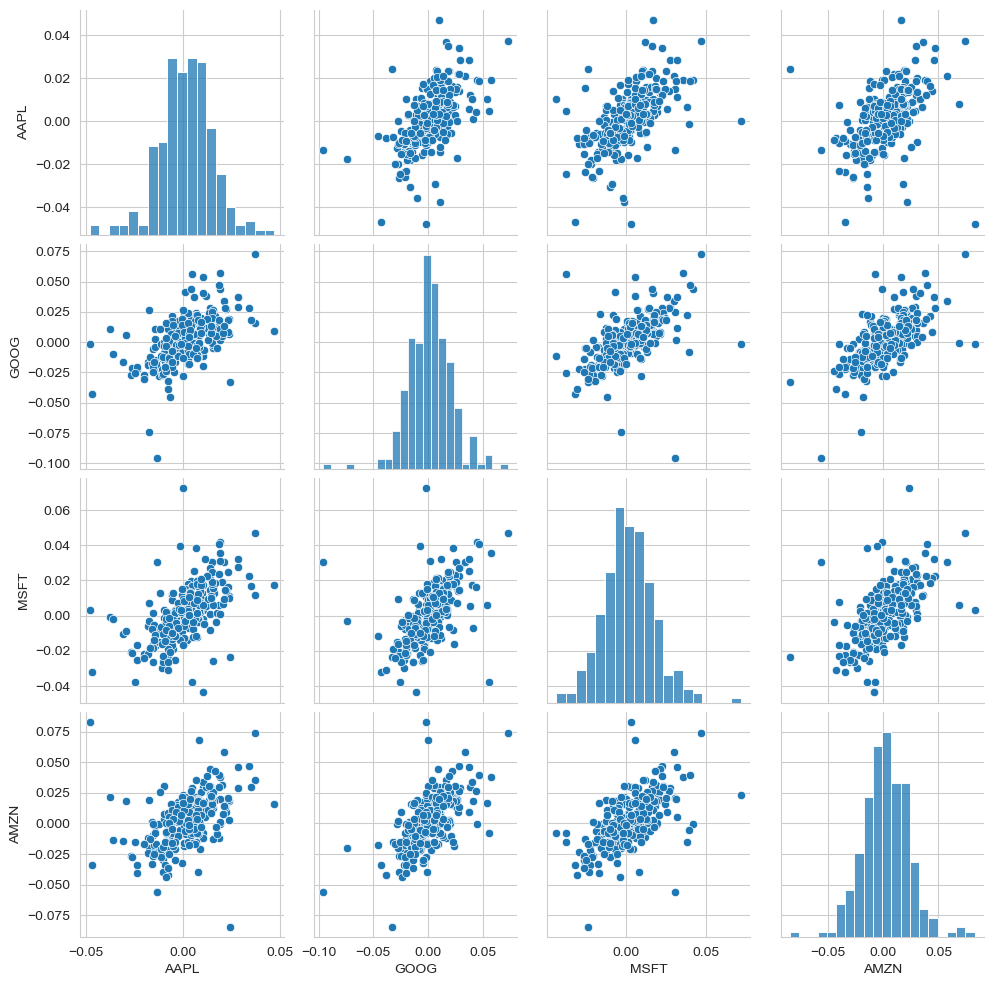

In [20]:
# Calling pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())

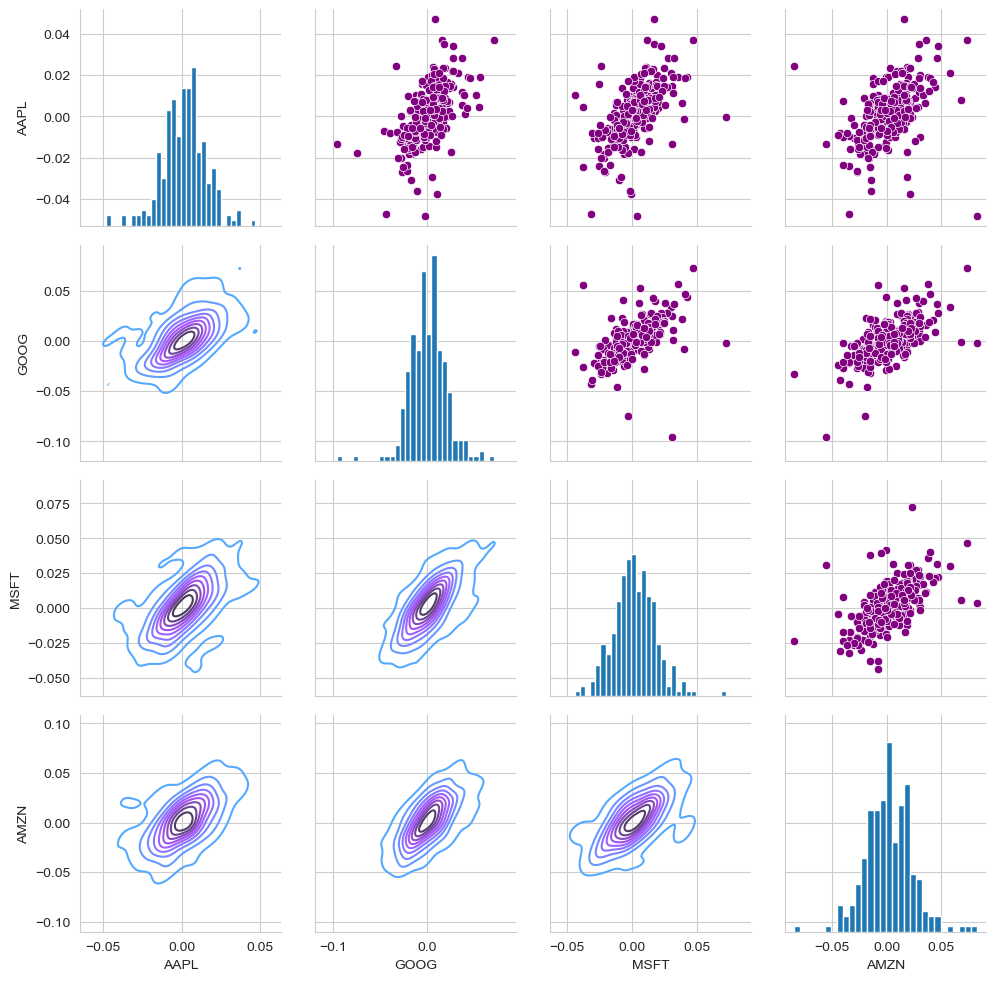

In [21]:
# Reshaping plots for better looikng

returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(sns.scatterplot, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

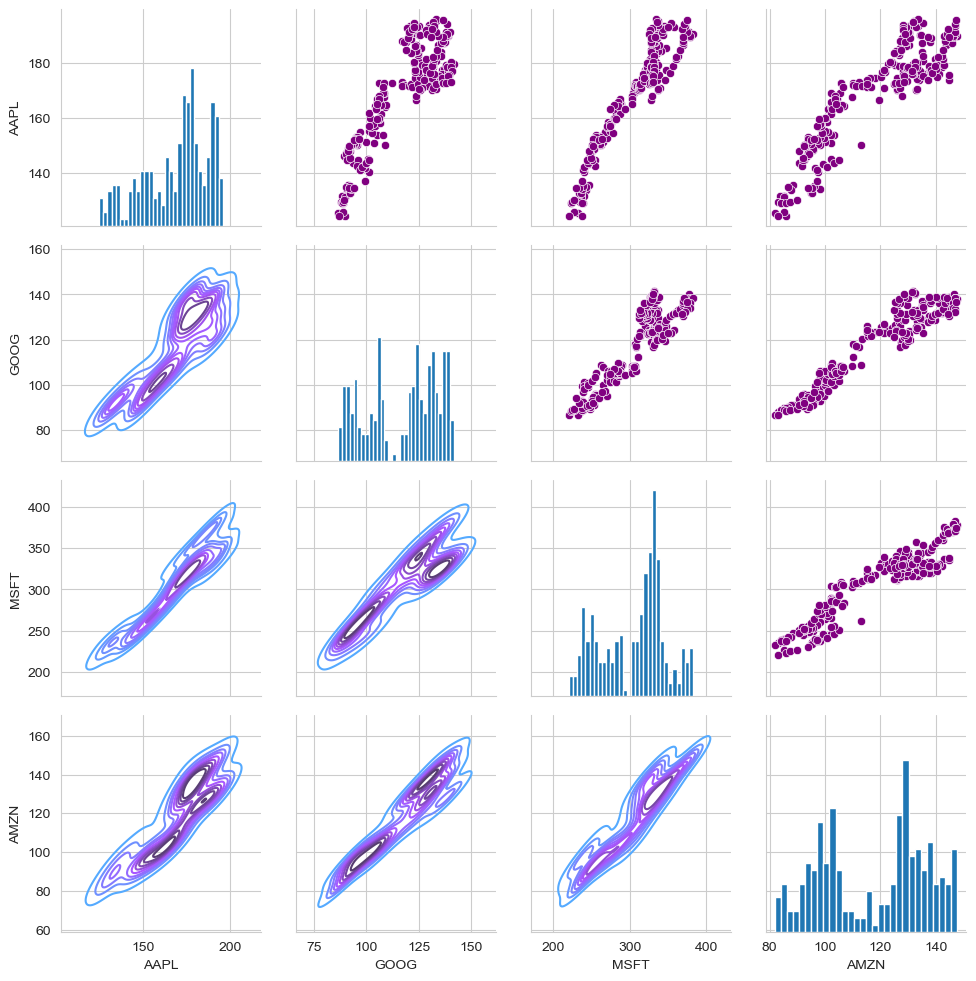

In [22]:
# Analyzing the correlation of the closing prices

returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(sns.scatterplot, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

<Axes: >

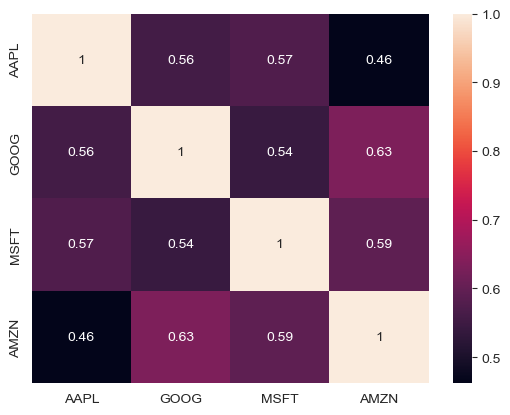

In [23]:
# Using seaborn for a quick correlation plot for the daily returns
tech_rets_corr= tech_rets.dropna().corr()
sns.heatmap(tech_rets_corr, annot=True)

<Axes: >

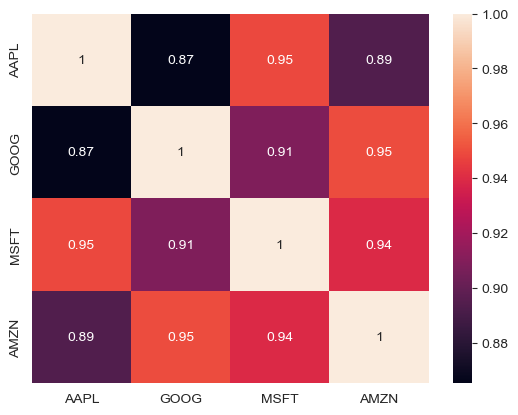

In [24]:
# And correlation plot for the closing price
closing_df__corr= closing_df.dropna().corr()
sns.heatmap(closing_df__corr, annot=True)

In [25]:
rets =tech_rets.dropna()

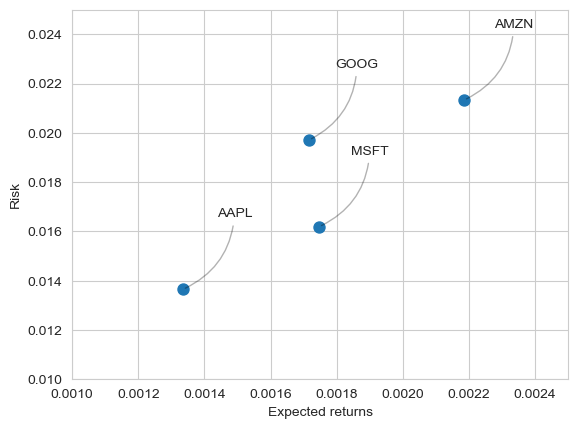

In [26]:
'''Implementing risk analysis by making scaater plot with expected returns (average value in daily returns) and 
risk (standard deviation in daily returns)'''

area = np.pi*20

plt.scatter(rets.mean(), rets.std(), s=area)

plt.ylim([0.01,0.025])
plt.xlim([0.0010,0.0025])

plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', color='black', alpha=0.3, connectionstyle = 'arc3,rad=-0.3'))

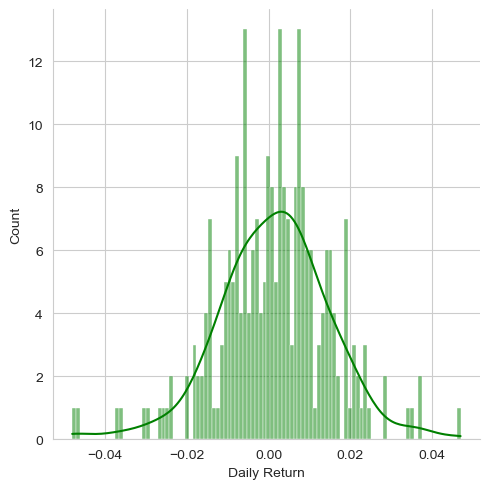

In [27]:
sns.displot(AAPL['Daily Return'].dropna(), bins=100,color='green', kde=True)

In [28]:
# The 0.05 empirical quantile of daily returns
rets['AAPL'].quantile(0.05)

-0.01919741611065264

For future calculations we will use geometric Brownian motion (GBM):
https://www.investopedia.com/articles/07/montecarlo.asp

In [29]:
# Set up time horizon
days = 365

# Delta
dt = 1/days

# Grabbing our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# Grabbing the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

In [37]:
# Using Monte Carlo Method

def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

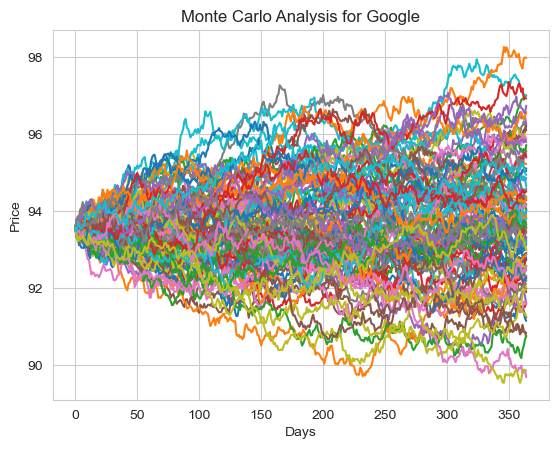

In [38]:
# Get start price from GOOG.head()
start_price = GOOG['Close'].head(1)[0]

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [39]:
# Set a large numebr of run
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

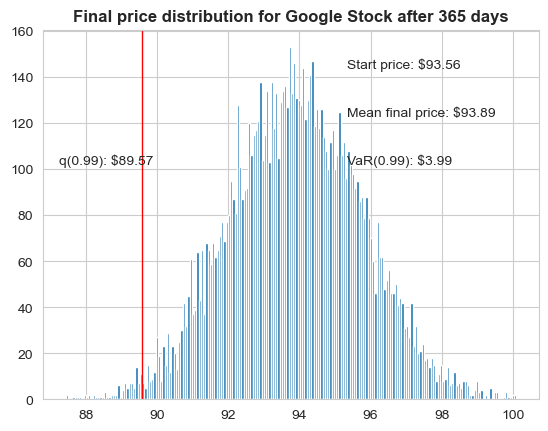

In [40]:
# Defining q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)

plt.hist(simulations, bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)

plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth =1, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');